In [3]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import scipy.io as io 
from sklearn.preprocessing import OneHotEncoder
from matplotlib import pyplot as plt

Loading the Data

In [4]:
trX = io.loadmat('/content/drive/MyDrive/train_32x32.mat')['X']
trY = io.loadmat('/content/drive/MyDrive/train_32x32.mat')['y']
tsX = io.loadmat('/content/drive/MyDrive/test_32x32.mat')['X']
tsY = io.loadmat('/content/drive/MyDrive/test_32x32.mat')['y']

Normalization

In [5]:
# Dividing pixel values by 255.
X_train=trX.astype('float32')/255.0
X_test=tsX.astype('float32')/255.0

One-Hot Vector Encoding

In [6]:
Y_train = OneHotEncoder().fit_transform(trY).toarray()
Y_test= OneHotEncoder().fit_transform(tsY).toarray()

CNN Model Architecture

In [7]:
# A sequential model
model=Sequential()

# Convolutional Layer
model.add(Conv2D(64, kernel_size=(5,5),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Covolutional Layer
model.add(Conv2D(64,kernel_size=(5,5),strides=(1,1),padding='same', activation='relu'))
# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
# Convolutional Layer
model.add(Conv2D(128,kernel_size=(5,5),strides=(1,1),padding='same', activation='relu'))
# Flattening Previous Layers Outputs
model.add(Flatten())
# Fully-Connected Layer
model.add(Dense(3072,activation='relu'))
# Fully-Connected Layer
model.add(Dense(2048,activation='relu'))
# Final Fully Connected Layer.
model.add(Dense(10,activation='softmax'))

Training the model by using SGD optimizer

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])
history=model.fit(X_train, Y_train,epochs=20, validation_data=(X_test,Y_test))

Epoch 1/20
2290/2290 [==============================] - 55s 10ms/step - loss: 2.2251 - accuracy: 0.1963 - val_loss: 1.1702 - val_accuracy: 0.6325
Epoch 2/20
2290/2290 [==============================] - 22s 9ms/step - loss: 0.8911 - accuracy: 0.7258 - val_loss: 0.6262 - val_accuracy: 0.8144
Epoch 3/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.4766 - accuracy: 0.8597 - val_loss: 0.4677 - val_accuracy: 0.8661
Epoch 4/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.3714 - accuracy: 0.8909 - val_loss: 0.4029 - val_accuracy: 0.8825
Epoch 5/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.3108 - accuracy: 0.9102 - val_loss: 0.3711 - val_accuracy: 0.8938
Epoch 6/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.2626 - accuracy: 0.9242 - val_loss: 0.5468 - val_accuracy: 0.8612
Epoch 7/20
2290/2290 [==============================] - 22s 10ms/step - loss: 0.2179 - accuracy: 0.9385 - val_loss: 0.4351 - 

Calculating training and testing accuracies and losses

In [9]:
train_acc = history.history['accuracy']
test_acc = history.history['val_accuracy']

train_loss = history.history['loss']
test_loss = history.history['val_loss']

Graph of Epochs VS Training Loss

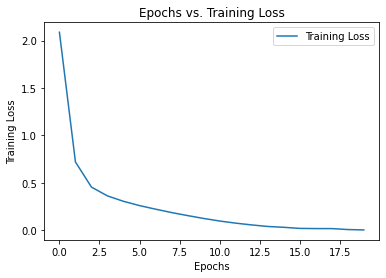

In [10]:
plt.plot(train_loss, label='Training Loss')
plt.legend()
plt.title('Epochs vs. Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show()

Graph of Epochs VS  Testing Loss

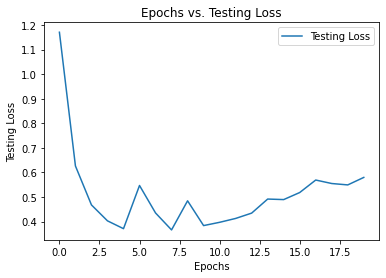

In [11]:
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Testing Loss')
plt.show()

Graph of Epochs VS Training and Testing Loss

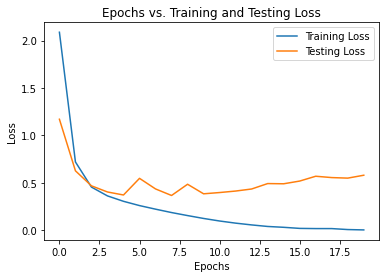

In [12]:
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.legend()
plt.title('Epochs vs. Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

Graph of Epochs VS Training and Testing Accuracy

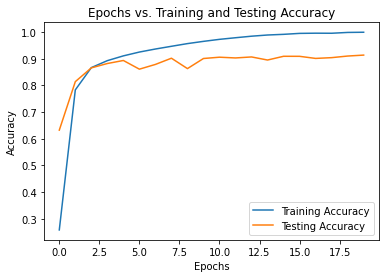

In [13]:
plt.plot(train_acc, label='Training Accuracy')
plt.plot(test_acc, label='Testing Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

Evaluating the model on testing data

In [15]:
test_loss, test_acc = model.evaluate(x=X_test, y=Y_test, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.9140 
Test loss is: 0.5796
